In [365]:
import random
import matplotlib.pyplot as plt
import statistics as st

#Game

In [366]:
class Game:
    def __init__(self, player):
        self.turns = 7
        self.player = player
        
    def start(self):
        while self.turns > 0:
            self.player.turn(self.turns)
            self.turns -= 1
        return self.player.record_score()
    
    def reset(self):
        self.player.reset()
        self.turns = 7
            

#Dice

In [367]:
class Die:
    def roll(self):
        return random.randint(1,6)
        

#Base Player Class

In [368]:
class Base_player:
    def __init__(self):
        self.current_score = 0
        self.wins = 0
        self.die = Die()
        
    def reset(self):
        self.current_score = 0
        
    def turn(self, num_of_turns=1):
        turn_score = 0
        roll = self.die.roll()
        if roll == 1:
            turn_score = 0
        else:
            turn_score += roll
        self.current_score += turn_score
        
    def record_score(self):
        return self.current_score
        
        
    

#Roll Player

In [369]:
class Roll_player(Base_player):
    def turn(self, num_of_turns=1):
        turn_score = 0
        while turn_score < 10:
            roll = self.die.roll()
            if roll == 1:
                turn_score = 0
                break
            else:
                turn_score += roll
        self.current_score += turn_score
        

#Simple Roll Player

In [370]:
class Simp_roll_player(Base_player):
    def turn(self, num_of_turns=1):
        turn_score = 0
        i = 3
        while i > 0:
            roll = self.die.roll()
            if roll == 1:
                turn_score = 0
                break
            else:
                turn_score += roll
                i -= 1
        self.current_score += turn_score

#Turn Player

In [371]:
class Turn_player(Base_player):
    def turn(self, num_of_turns):
        turn_score = 0
        turns_left = num_of_turns
        if turns_left < 2 and self.current_score < 20:
            while turn_score < 22:
                roll = self.die.roll()
                if roll == 1:
                    turn_score = 0
                    break
                else:
                    turn_score += roll
        elif turns_left > 6:
            while turn_score < 10:
                roll = self.die.roll()
                if roll == 1:
                    turn_score = 0
                    break
                else:
                    turn_score += roll
        else:
            while turn_score < 15:
                roll = self.die.roll()
                if roll == 1:
                    turn_score = 0
                    break
                else:
                    turn_score += roll
        self.current_score += turn_score


#Simulation

In [372]:
class Simulation:
    def __init__(self):
        self.p1 = Base_player()
        self.p2 = Roll_player()
        self.p3 = Turn_player()
        self.p4 = Simp_roll_player()
        self.p1_scores = []
        self.p2_scores = []
        self.p3_scores = []
        self.p4_scores = []
        
    def run_simulation(self, n):
        game1 = Game(self.p1)
        game2 = Game(self.p2)
        game3 = Game(self.p3)
        game4 = Game(self.p4)
        num_rounds = n
        while num_rounds > 0:
            p1_score = game1.start()
            self.p1_scores.append(p1_score)
            game1.reset()
            p2_score = game2.start()
            self.p2_scores.append(p2_score)
            game2.reset()
            p3_score = game3.start()
            self.p3_scores.append(p3_score)
            game3.reset()
            p4_score = game4.start()
            self.p4_scores.append(p4_score)
            game4.reset()
            num_rounds -= 1
        list_results = [self.p1_scores, self.p2_scores, self.p3_scores, self.p4_scores]
        return list_results
            

In [373]:
def get_data(num_sims):
    sims = num_sims
    results_dict = {}
    while sims > 0:
        sim = Simulation()
        results_dict[sims] = sim.run_simulation(50)
        sims -= 1
    return results_dict

In [374]:
%matplotlib inline

In [375]:
results = get_data(100)
p1_scores = [pair[1][0] for pair in results.items()]
p2_scores = [pair[1][1] for pair in results.items()]
p3_scores = [pair[1][2] for pair in results.items()]
p4_scores = [pair[1][3] for pair in results.items()]
    
def get_means():
    p1_means = [st.mean(game) for game in p1_scores]
    p2_means = [st.mean(game) for game in p2_scores]
    p3_means = [st.mean(game) for game in p3_scores]
    p4_means = [st.mean(game) for game in p4_scores]
    return (p1_means, p2_means, p3_means, p4_means)
    
means = get_means()

def get_stdevs():
    p1_stdevs = [st.stdev(game) for game in p1_scores]
    p2_stdevs = [st.stdev(game) for game in p2_scores]
    p3_stdevs = [st.stdev(game) for game in p3_scores]
    p4_stdevs = [st.stdev(game) for game in p4_scores]
    return (p1_stdevs, p2_stdevs, p3_stdevs, p4_stdevs)
    
stdevs = get_stdevs()

def get_scores_over_40():
    p1_good_scores = [score for game in p1_scores for score in game if score > 40]
    p2_good_scores = [score for game in p2_scores for score in game if score > 40]
    p3_good_scores = [score for game in p3_scores for score in game if score > 40]
    p4_good_scores = [score for game in p4_scores for score in game if score > 40]
    return (len(p1_good_scores), len(p2_good_scores), len(p3_good_scores), len(p4_good_scores))

good_scores = get_scores_over_40()



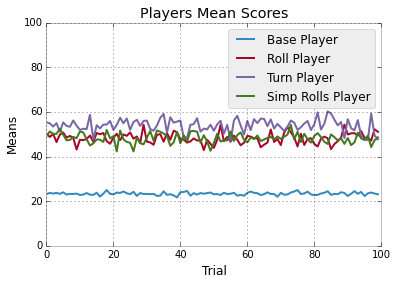

In [376]:
x1 = range(100)
y1 = means[0]
y2 = means[1]
y3 = means[2]
y4 = means[3]
plt.plot(x1,y1, label="Base Player")
plt.plot(x1,y2, label="Roll Player")
plt.plot(x1,y3, label="Turn Player")
plt.plot(x1,y4, label="Simp Rolls Player")
plt.ylim(ymin=0)
plt.ylim(ymax=100)
plt.xlabel("Trial")
plt.ylabel("Means")
plt.title("Players Mean Scores")
plt.style.use('bmh')
plt.legend()
plt.show()

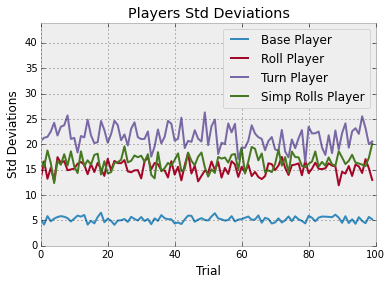

In [379]:
x1 = range(100)
y1 = stdevs[0]
y2 = stdevs[1]
y3 = stdevs[2]
y4 = stdevs[3]
plt.plot(x1,y1, label="Base Player")
plt.plot(x1,y2, label="Roll Player")
plt.plot(x1,y3, label="Turn Player")
plt.plot(x1,y4, label="Simp Rolls Player")
plt.ylim(ymin=0)
plt.ylim(ymax=44)
plt.xlabel("Trial")
plt.ylabel("Std Deviations")
plt.title("Players Std Deviations")
plt.style.use('bmh')
plt.legend()
plt.show()

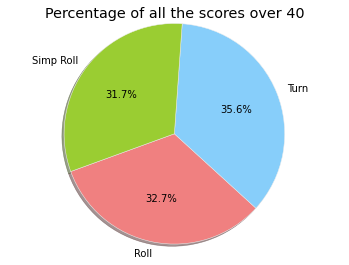

In [378]:
total = sum(good_scores)
pl1 = 10 * round((good_scores[0]/total),2)
pl2 = 10 * round((good_scores[1]/total),2)
pl3 = 10 * round((good_scores[2]/total),2)
pl4 = 10 * round((good_scores[3]/total),2)
# The slices will be ordered and plotted counter-clockwise.
labels = 'Roll', 'Turn', 'Simp Roll'
sizes = [pl2, pl3, pl4]
colors = ['lightcoral', 'lightskyblue', 'yellowgreen']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=200)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title("Percentage of all the scores over 40")
plt.style.use('bmh')

plt.show()

I think the turn player is slightly better than the roll player although they get very similar results.<br />
Also the turn player model won't work well in the competitive game because it relies on knowing how many turns it has left. I'll probably use the Roll player in the competitive game.